In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime
import matplotlib.pyplot as plot
from pandas import DataFrame, Series
tr_data=pd.read_csv('avg.csv',index_col=0)
shuffler= np.random.permutation(len(tr_data))
tr_data1=tr_data.take(shuffler)
tr1=(tr_data1-tr_data1.describe().loc['mean'])/tr_data1.describe().loc['std']
tr=tr1.iloc[:-500,:]
te=tr1.iloc[-500:,:]

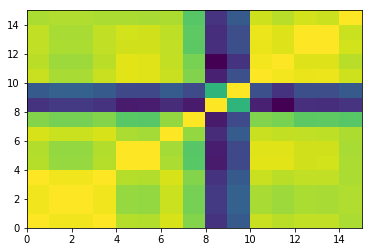

In [2]:
corMat=pd.DataFrame(tr.corr())
plot.pcolor(corMat)
plot.show()

In [3]:
tr.columns

Index([' Changliu3 - Avg[V 有效值 A] (V)', ' Changliu1 - Avg[V 有效值 A] (V)',
       ' Changliu2 - Avg[V 有效值 A] (V)', ' Changliu4 - Avg[V 有效值 A] (V)',
       ' KunYang3 - Avg[V 有效值 A] (V)', ' KunYang1 - Avg[V 有效值 A] (V)',
       ' WanKe2 - Avg[V 有效值 A] (V)', ' WanKe1 - Avg[V 有效值 A] (V)',
       ' QinZhou4 - Avg[V 有效值 A] (V)', ' QinZhou3 - Avg[V 有效值 A] (V)',
       ' JiangChuan5 - Avg[V 有效值 A] (V)', ' JiangChuan3 - Avg[V 有效值 A] (V)',
       ' JiangChuan1 - Avg[V 有效值 A] (V)', ' JiangChuan4 - Avg[V 有效值 A] (V)',
       ' JiangChuan2 - Avg[V 有效值 A] (V)'],
      dtype='object')

In [2]:
###### network from keras for SHDKY data simulation ###########
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
import keras
import numpy as np


model = Sequential()

model.add(Dense(14, input_dim=14,init="normal"))
model.add(Activation('tanh'))
model.add(Dense(7, activation='tanh',init="normal"))
model.add(Dense(1, activation='linear',init="normal"))

/home/techstar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, input_dim=14, kernel_initializer="normal")`
  # Remove the CWD from sys.path while we load stuff.
/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="tanh", kernel_initializer="normal")`
  if sys.path[0] == '':
/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="no

In [3]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=0.2))

In [4]:
Y=np.array(tr.iloc[:,7:8])
X=np.array(tr.iloc[:,0:7].join(tr.iloc[:,8:15])) 
 

In [6]:
model.fit(X, Y, epochs=30,batch_size=10,
          shuffle=True,verbose=2,validation_split=0.2)  

Train on 2239 samples, validate on 560 samples
Epoch 1/30
 - 0s - loss: nan - val_loss: nan
Epoch 2/30
 - 0s - loss: nan - val_loss: nan
Epoch 3/30
 - 0s - loss: nan - val_loss: nan
Epoch 4/30
 - 0s - loss: nan - val_loss: nan
Epoch 5/30
 - 0s - loss: nan - val_loss: nan
Epoch 6/30
 - 0s - loss: nan - val_loss: nan
Epoch 7/30
 - 0s - loss: nan - val_loss: nan
Epoch 8/30
 - 0s - loss: nan - val_loss: nan
Epoch 9/30
 - 0s - loss: nan - val_loss: nan
Epoch 10/30
 - 0s - loss: nan - val_loss: nan
Epoch 11/30
 - 0s - loss: nan - val_loss: nan
Epoch 12/30
 - 0s - loss: nan - val_loss: nan
Epoch 13/30
 - 0s - loss: nan - val_loss: nan
Epoch 14/30
 - 0s - loss: nan - val_loss: nan
Epoch 15/30
 - 0s - loss: nan - val_loss: nan
Epoch 16/30
 - 0s - loss: nan - val_loss: nan
Epoch 17/30
 - 0s - loss: nan - val_loss: nan
Epoch 18/30
 - 0s - loss: nan - val_loss: nan
Epoch 19/30
 - 0s - loss: nan - val_loss: nan
Epoch 20/30
 - 0s - loss: nan - val_loss: nan
Epoch 21/30
 - 0s - loss: nan - val_loss: 

In [64]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=0.01))

In [70]:
YT=np.array(te.iloc[:,7:8])
XT=np.array(te.iloc[:,0:7].join(te.iloc[:,8:15]))

In [5]:
model.predict(XT)[:10]

array([[ 0.88437206],
       [-0.8738656 ],
       [ 1.3840857 ],
       [-0.80696213],
       [-0.05274057],
       [-0.3807211 ],
       [-0.39439598],
       [ 1.8693032 ],
       [ 1.4855909 ],
       [-0.2581869 ]], dtype=float32)

In [6]:
YT[:10]

array([[ 0.89838981],
       [-0.92724402],
       [ 1.29552995],
       [-0.67634189],
       [-0.40138125],
       [-0.33053357],
       [-0.23591566],
       [ 1.87475125],
       [ 1.49636697],
       [-0.48786609]])

In [7]:
((model.predict(XT)-YT)/YT).mean()

-0.04416014198499619

In [8]:
tr.corr()

,Changliu3 - Avg[V 有效值 A] (V),Changliu1 - Avg[V 有效值 A] (V),Changliu2 - Avg[V 有效值 A] (V),Changliu4 - Avg[V 有效值 A] (V),KunYang3 - Avg[V 有效值 A] (V),KunYang1 - Avg[V 有效值 A] (V),WanKe2 - Avg[V 有效值 A] (V),WanKe1 - Avg[V 有效值 A] (V),QinZhou4 - Avg[V 有效值 A] (V),QinZhou3 - Avg[V 有效值 A] (V),JiangChuan5 - Avg[V 有效值 A] (V),JiangChuan3 - Avg[V 有效值 A] (V),JiangChuan1 - Avg[V 有效值 A] (V),JiangChuan4 - Avg[V 有效值 A] (V),JiangChuan2 - Avg[V 有效值 A] (V)
Changliu3 - Avg[V 有效值 A] (V),1.000000,0.973250,0.973360,1.000000,0.849947,0.846402,0.919829,0.746587,-0.139924,0.034558,0.884655,0.862806,0.871882,0.871686,0.830801
Changliu1 - Avg[V 有效值 A] (V),0.973250,1.000000,0.999998,0.973260,0.786565,0.781482,0.894868,0.717027,-0.113359,0.070553,0.824539,0.801498,0.831651,0.823869,0.843015
Changliu2 - Avg[V 有效值 A] (V),0.973360,0.999998,1.000000,0.973370,0.786807,0.781733,0.894938,0.716831,-0.113862,0.069508,0.824576,0.801770,0.831761,0.823980,0.842980
Changliu4 - Avg[V 有效值 A] (V),1.000000,0.973260,0.973370,1.000000,0.849949,0.846401,0.919852,0.746613,-0.140072,0.034501,0.884631,0.862814,0.871862,0.871662,0.830774
KunYang3 - Avg[V 有效值 A] (V),0.849947,0.786565,0.786807,0.849949,1.000000,0.999696,0.830967,0.648610,-0.241379,-0.050334,0.941281,0.943070,0.904233,0.907582,0.830050
KunYang1 - Avg[V 有效值 A] (V),0.846402,0.781482,0.781733,0.846401,0.999696,1.000000,0.825286,0.641766,-0.234033,-0.048009,0.939006,0.939419,0.902018,0.905867,0.825488
WanKe2 - Avg[V 有效值 A] (V),0.919829,0.894868,0.894938,0.919852,0.830967,0.825286,1.000000,0.775816,-0.167449,0.045054,0.886352,0.877718,0.874573,0.869576,0.839686
WanKe1 - Avg[V 有效值 A] (V),0.746587,0.717027,0.716831,0.746613,0.648610,0.641766,0.775816,1.000000,-0.238531,-0.037247,0.740399,0.721839,0.652996,0.658432,0.643759
QinZhou4 - Avg[V 有效值 A] (V),-0.139924,-0.113359,-0.113862,-0.140072,-0.241379,-0.234033,-0.167449,-0.238531,1.000000,0.526979,-0.211651,-0.334487,-0.154803,-0.156717,-0.135494
QinZhou3 - Avg[V 有效值 A] (V),0.034558,0.070553,0.069508,0.034501,-0.050334,-0.048009,0.045054,-0.037247,0.526979,1.000000,-0.009195,-0.136737,-0.016965,-0.022490,0.032860


In [143]:
YT.shape

(500, 1)

In [87]:
R= pd.DataFrame(YT,columns=['V_true']).join(pd.DataFrame(model.predict(XT),columns=['V_pred']))
R= R * (tr_data1.describe().loc["std"][7])+(tr_data1.describe().loc["mean"][7])
R.index = te.index
R.to_csv("V_test.csv")

In [88]:
R_show=R.iloc[200:300,:]
#R_show=R_show*(tr_data1.describe().loc["std"][7])+(tr_data1.describe().loc["mean"][7])

In [73]:
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

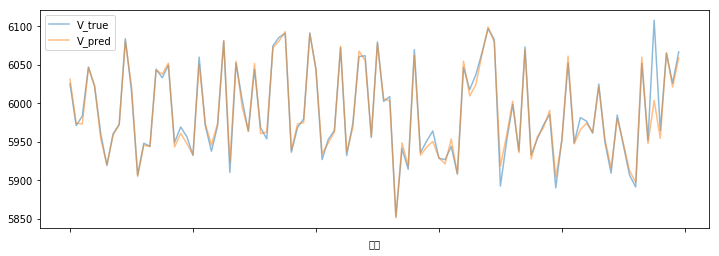

In [89]:
R_show.plot(alpha =0.5,figsize = (12,4))

In [75]:
tr_data1.describe().loc["mean"][7]

5986.85033402641

In [90]:
R_show

,V_true,V_pred
时间,,
2018-02-02 07:15:00,6025.586914,6031.426758
2018-02-07 15:15:00,5971.305176,5974.279297
2018-02-06 21:06:00,5983.411621,5973.321777
2018-02-07 23:33:00,6047.307129,6046.389160
2018-02-01 06:48:00,6022.383301,6022.393555
2018-02-01 15:42:00,5960.565918,5953.837402
2018-02-06 10:12:00,5919.459473,5920.324707
2018-02-07 12:42:00,5960.423340,5958.629883
2018-02-01 21:30:00,5972.660645,5972.683594


In [91]:
model.save('wanke1V.h5')

In [1]:
from keras.models import load_model
model = load_model('wanke1V.h5')

/home/techstar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
tr_data[:10]

,Changliu3 - Avg[V 有效值 A] (V),Changliu1 - Avg[V 有效值 A] (V),Changliu2 - Avg[V 有效值 A] (V),Changliu4 - Avg[V 有效值 A] (V),KunYang3 - Avg[V 有效值 A] (V),KunYang1 - Avg[V 有效值 A] (V),WanKe2 - Avg[V 有效值 A] (V),WanKe1 - Avg[V 有效值 A] (V),QinZhou4 - Avg[V 有效值 A] (V),QinZhou3 - Avg[V 有效值 A] (V),JiangChuan5 - Avg[V 有效值 A] (V),JiangChuan3 - Avg[V 有效值 A] (V),JiangChuan1 - Avg[V 有效值 A] (V),JiangChuan4 - Avg[V 有效值 A] (V),JiangChuan2 - Avg[V 有效值 A] (V)
时间,,,,,,,,,,,,,,,
2018-02-01 00:03:00,66689.328125,66608.898438,66622.414062,66701.531250,6032.978516,21057.583984,6099.680176,6042.454102,5987.212402,6064.176270,21204.341797,65067.058594,67055.984375,21228.886719,66518.101562
2018-02-01 00:06:00,66729.289062,66658.226562,66671.656250,66741.570312,6030.360840,21052.384766,6100.542480,6046.033203,5985.473633,6059.596680,21197.259766,65062.695312,67022.359375,21216.039062,66502.570312
2018-02-01 00:09:00,66742.140625,66668.492188,66681.851562,66754.437500,6029.826172,21049.818359,6101.580078,6044.109375,5986.658203,6059.344238,21203.070312,65054.359375,67069.492188,21232.937500,66517.156250
2018-02-01 00:12:00,66788.210938,66716.781250,66729.828125,66800.554688,6033.500488,21061.951172,6103.916016,6048.876465,5988.164551,6059.388672,21211.332031,65097.171875,67124.429688,21249.861328,66526.226562
2018-02-01 00:15:00,66826.726562,66738.203125,66750.937500,66839.343750,6037.816895,21078.814453,6091.962891,6036.658691,5993.001465,6063.626465,21226.585938,65144.921875,67147.804688,21256.716797,66574.632812
2018-02-01 00:18:00,66842.171875,66780.140625,66793.000000,66854.742188,6034.217773,21062.003906,6092.671387,6039.014160,5980.618652,6048.906738,21222.375000,65081.582031,67138.664062,21255.105469,66576.539062
2018-02-01 00:21:00,66846.710938,66771.929688,66784.664062,66859.281250,6027.786133,21041.796875,6093.177246,6041.087402,5981.133789,6049.381348,21219.298828,65026.019531,67163.968750,21264.179688,66594.429688
2018-02-01 00:24:00,66852.742188,66794.359375,66807.484375,66865.523438,6027.411133,21039.669922,6089.990234,6036.800293,5980.863770,6049.068848,21219.833984,65018.097656,67147.234375,21260.587891,66594.632812
2018-02-01 00:27:00,66860.687500,66805.054688,66818.218750,66873.445312,6027.326660,21039.837891,6094.602051,6041.306641,5974.845703,6042.120117,21222.773438,65026.761719,67127.742188,21254.255859,66601.796875
